## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
!nvidia-smi

Sat Apr 22 03:50:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

# !pip install ultralytics==8.0.20

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
!pip install -e .

Cloning into 'ultralytics'...
remote: Enumerating objects: 7099, done.
remote: Counting objects: 100% (703/703), done.
remote: Compressing objects: 100% (381/381), done.
remote: Total 7099 (delta 358), reused 594 (delta 321), pack-reused 6396
Receiving objects: 100% (7099/7099), 5.57 MiB | 18.04 MiB/s, done.
Resolving deltas: 100% (4712/4712), done.
/content/ultralytics
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 9.4 MB/s eta 0:00:00
  Running setup.py develop for ultralytics


In [ ]:
# !git clone https://github.com/swetha14r/ultralytics
# %cd ultralytics
# !pip install -e .


In [5]:
from IPython import display

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.84 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Custom Training

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="Nz5FjYhFGviCKM4DIvLK")
# project = rf.workspace("fyp-dgvrc").project("fish-biomass-estimation-v8")
# dataset = project.version(1).download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="i1HvqDEC5EyYfFfrYWu5")
project = rf.workspace("fish-biomass").project("final-grjrt")
dataset = project.version(2).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.84, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Final-2 in yolov8:: 100%|██████████| 10662/10662 [00:02<00:00, 3718.98it/s]


In [ ]:
%cd {HOME}
# !yolo detect train data={dataset.location}/data.yaml model=yolov8s.yaml pretrained=yolov8s.pt epochs=100 imgsz=800

# !yolo task=detect mode=train model=yolov8.yaml data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv             

In [9]:
%cd {HOME}/gdrive/MyDrive/yolov8
!yolo detect train data={dataset.location}/data.yaml model=yolov8.yaml epochs=50 imgsz=800 save_txt=True

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/yolov8'
/content/datasets
WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.module

In [ ]:
# !yolo detect val model=/content/ultralytics/runs/detect/train/weights/best.pt

In [10]:
!ls {HOME}/ultralytics/runs/detect/train2/

args.yaml					    results.png
confusion_matrix.png				    train_batch0.jpg
events.out.tfevents.1682135583.29d3347f8dcc.1820.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
labels						    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


/content


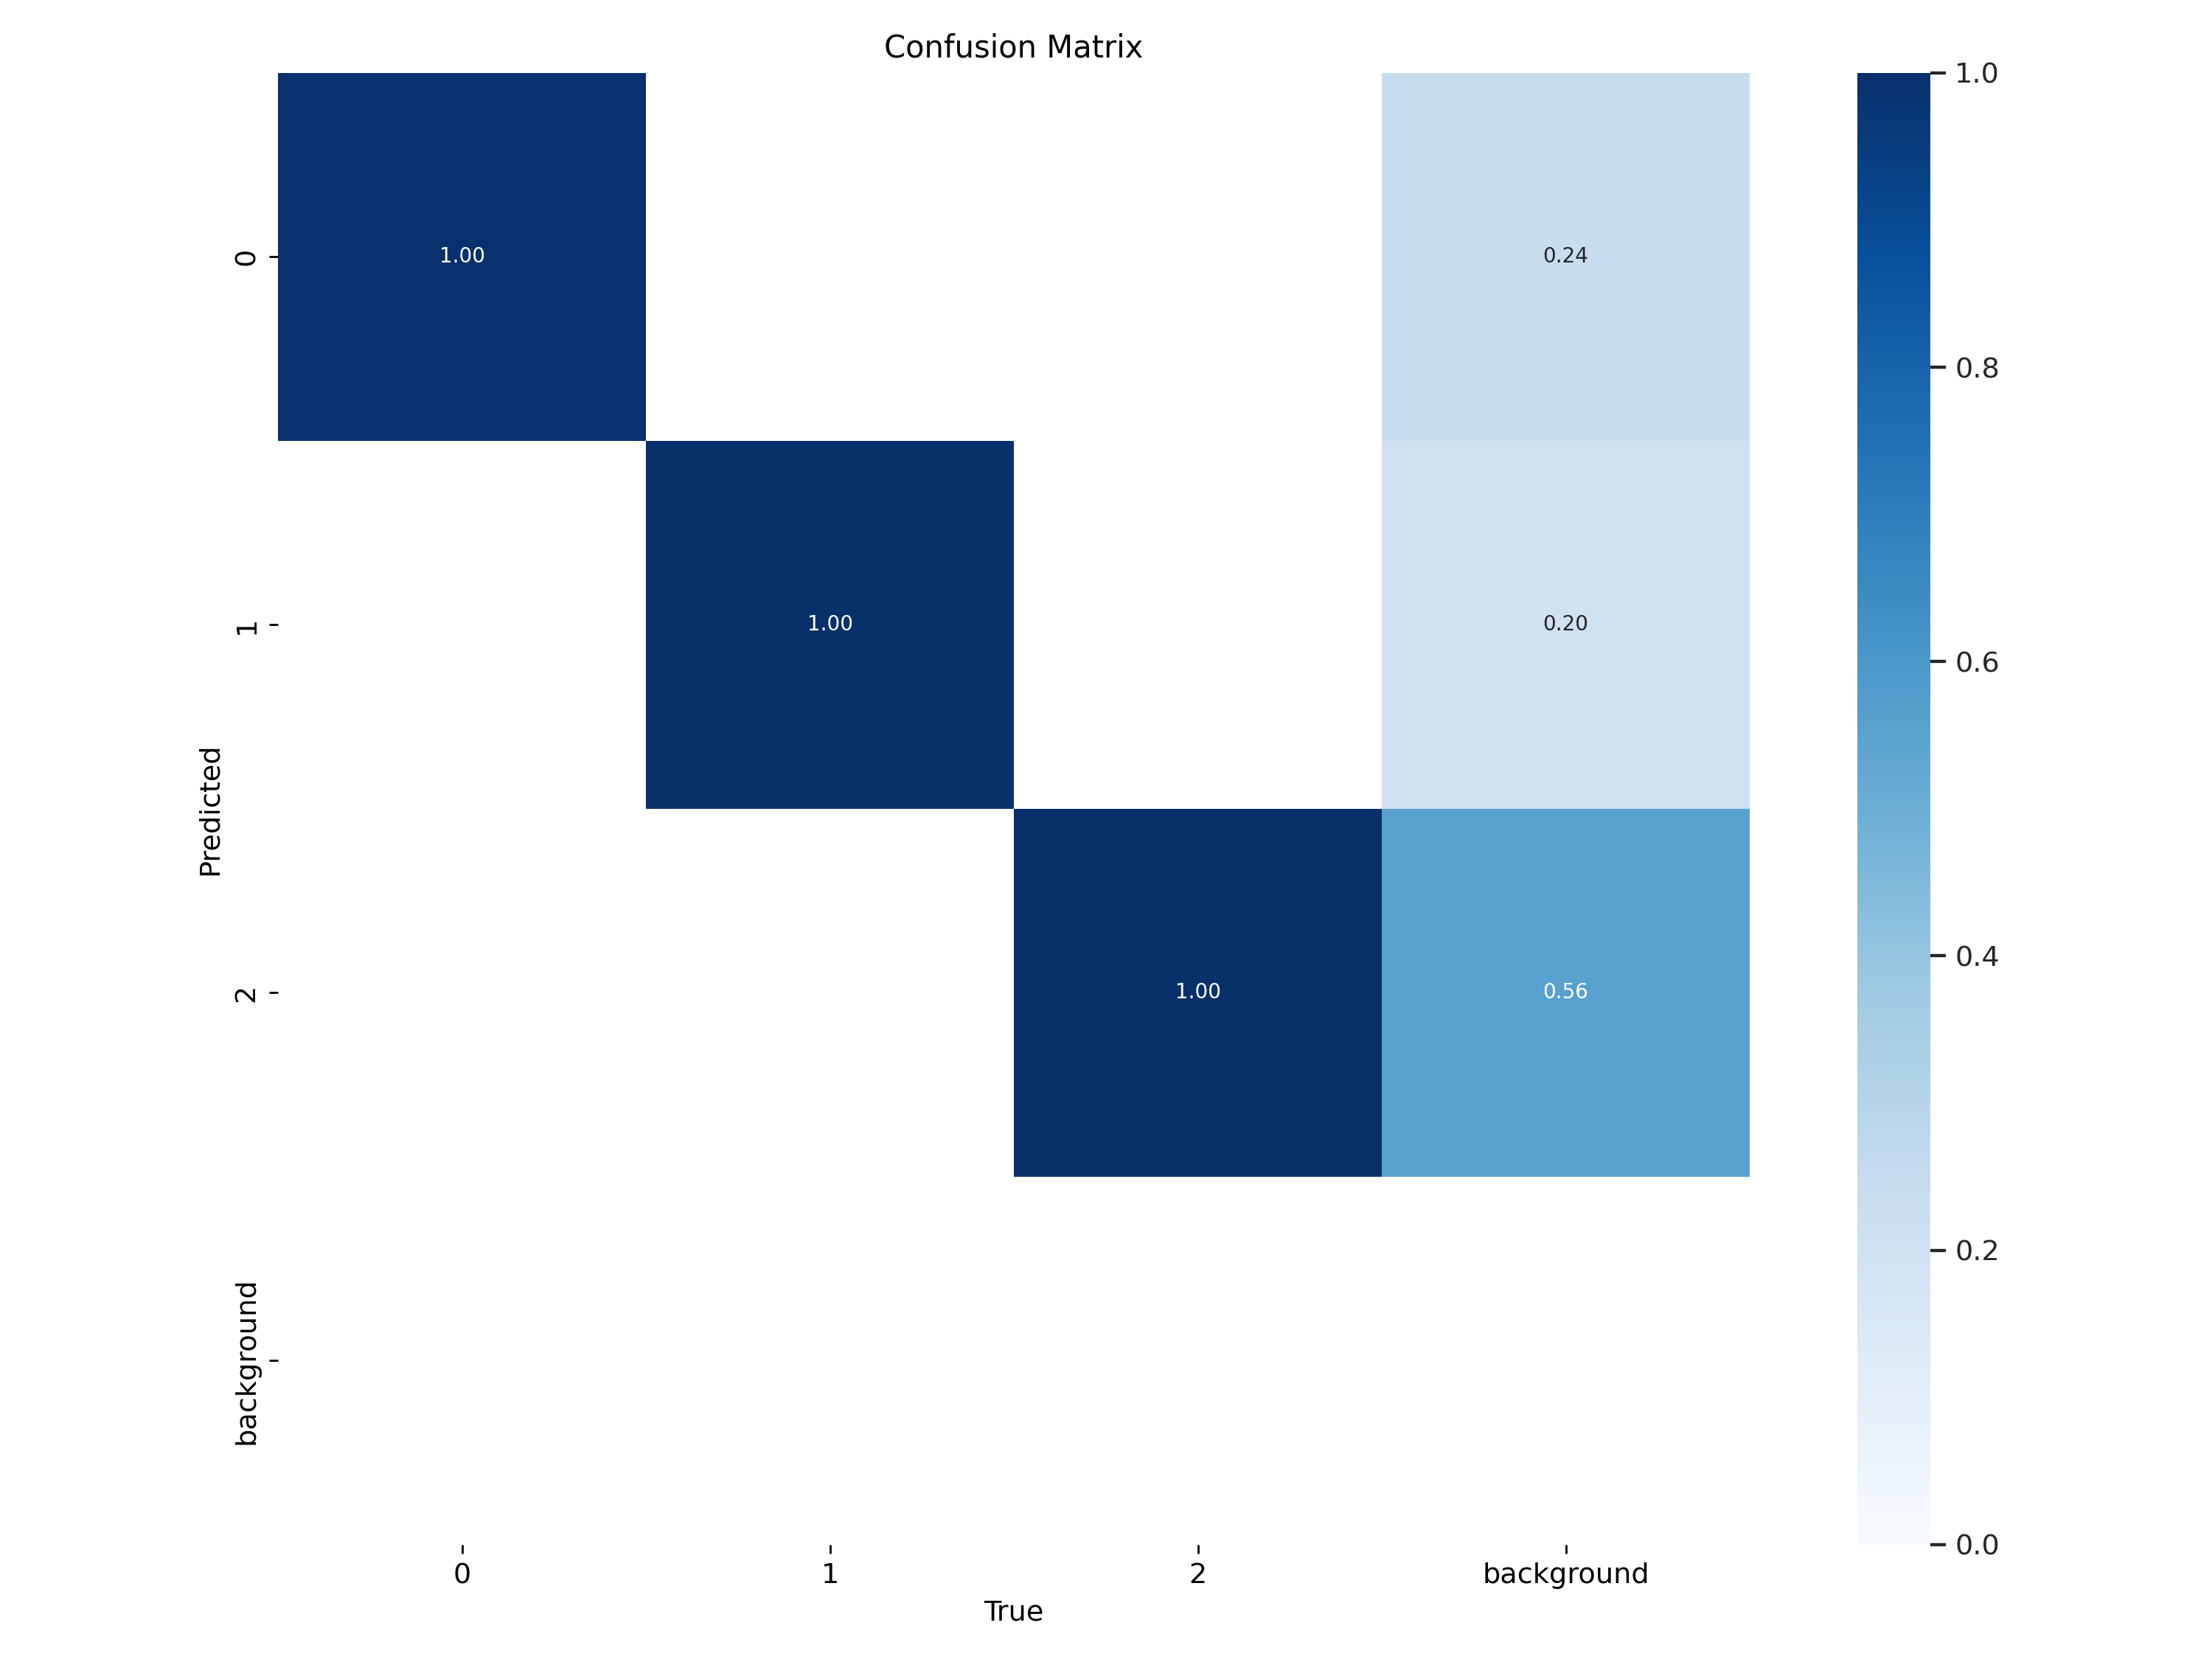

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/ultralytics/runs/detect/train2/confusion_matrix.png', width=600)

/content


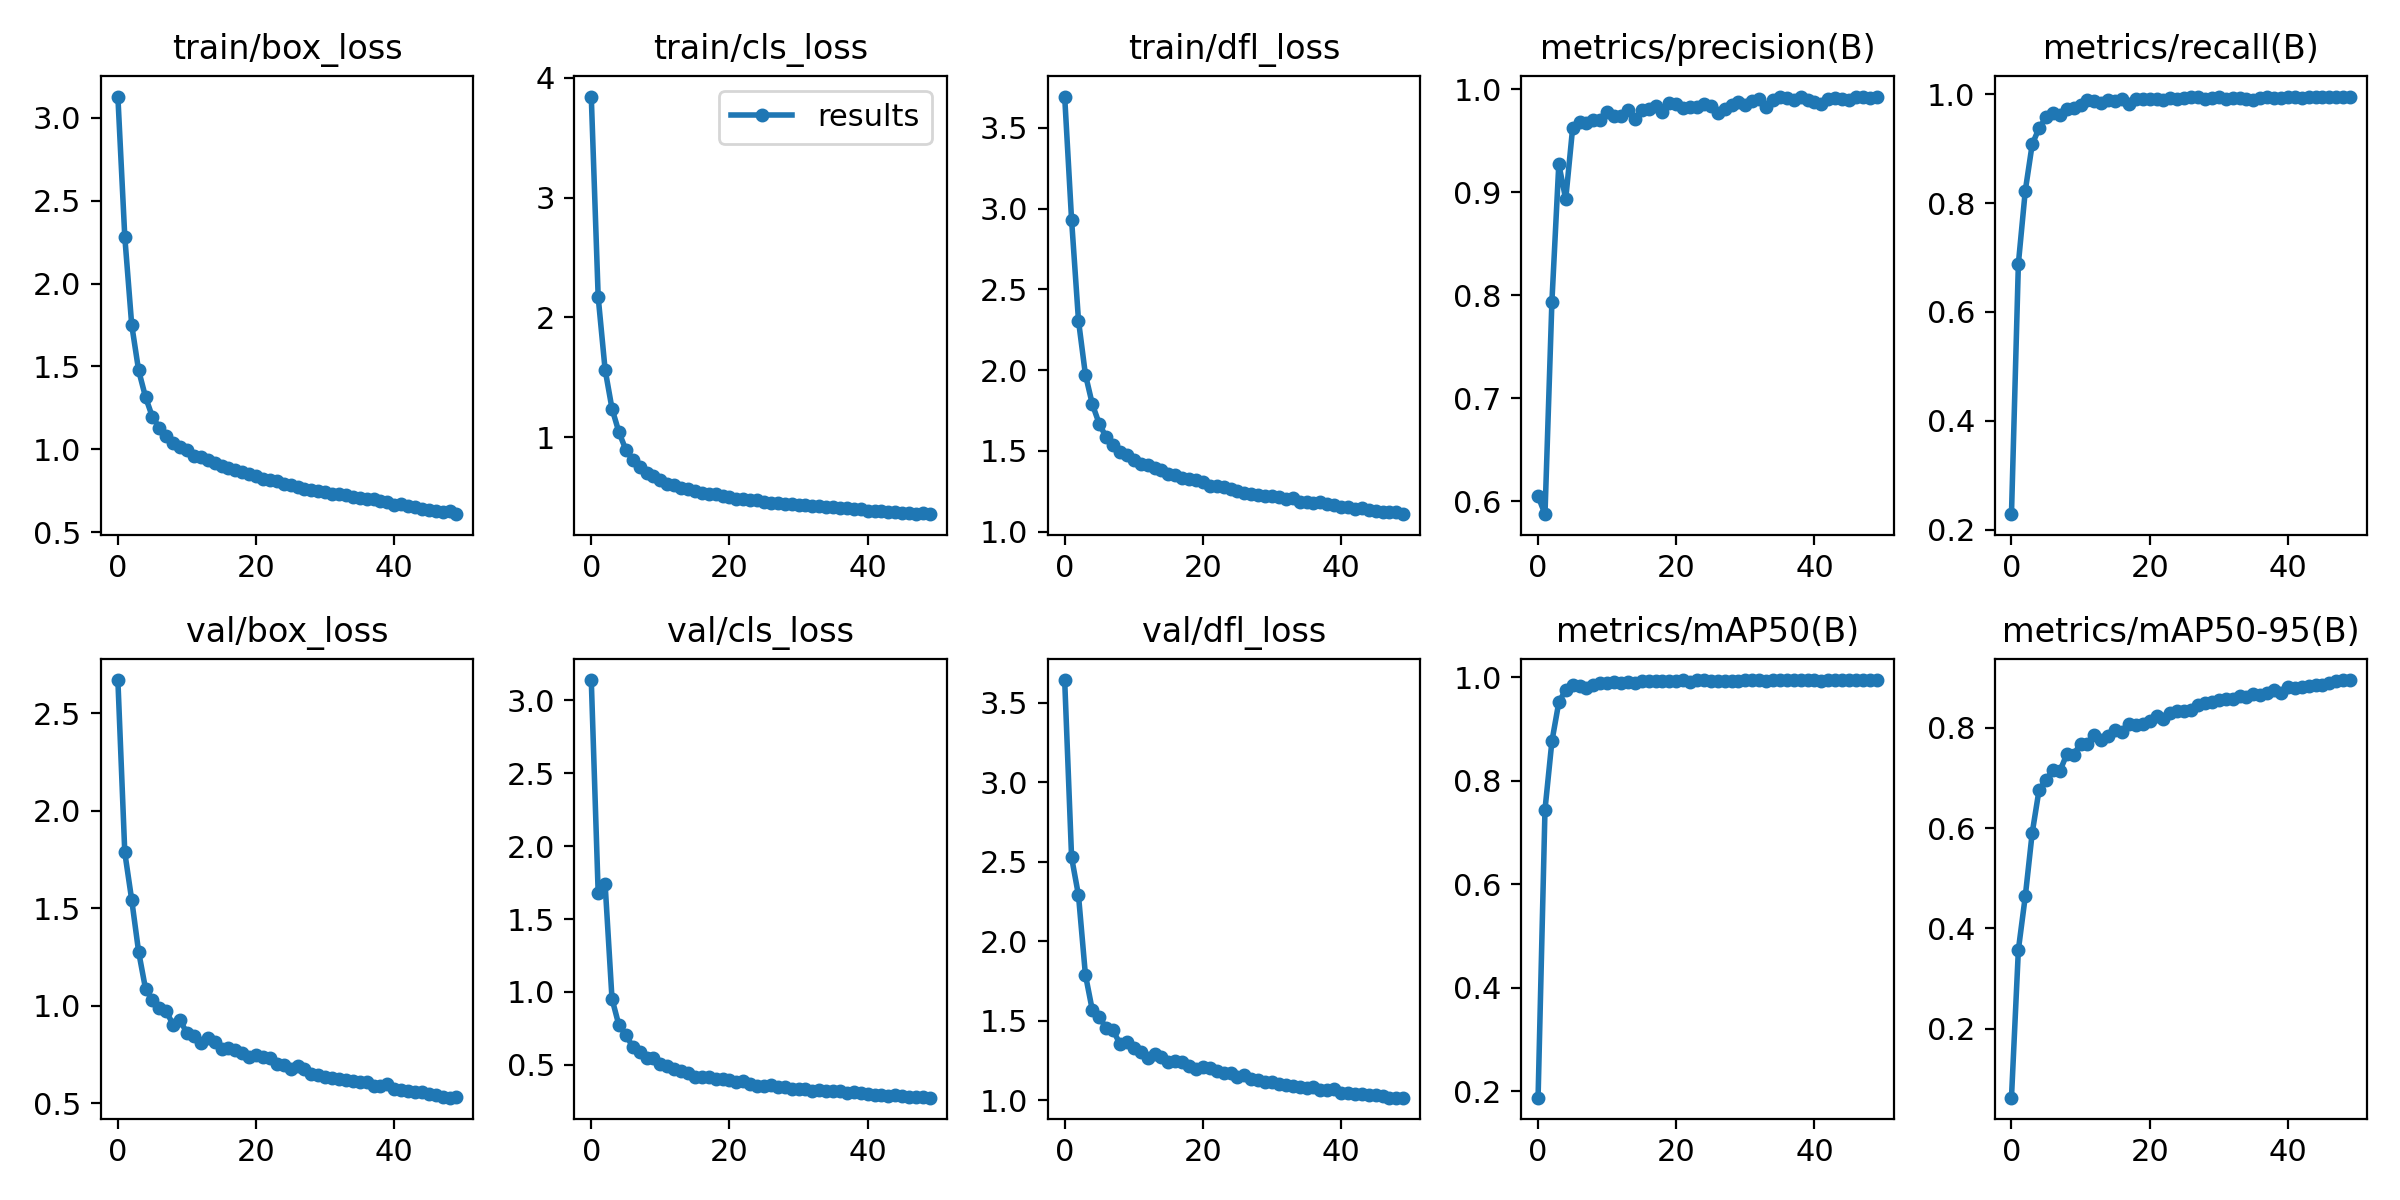

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/ultralytics/runs/detect/train2/results.png', width=600)

/content


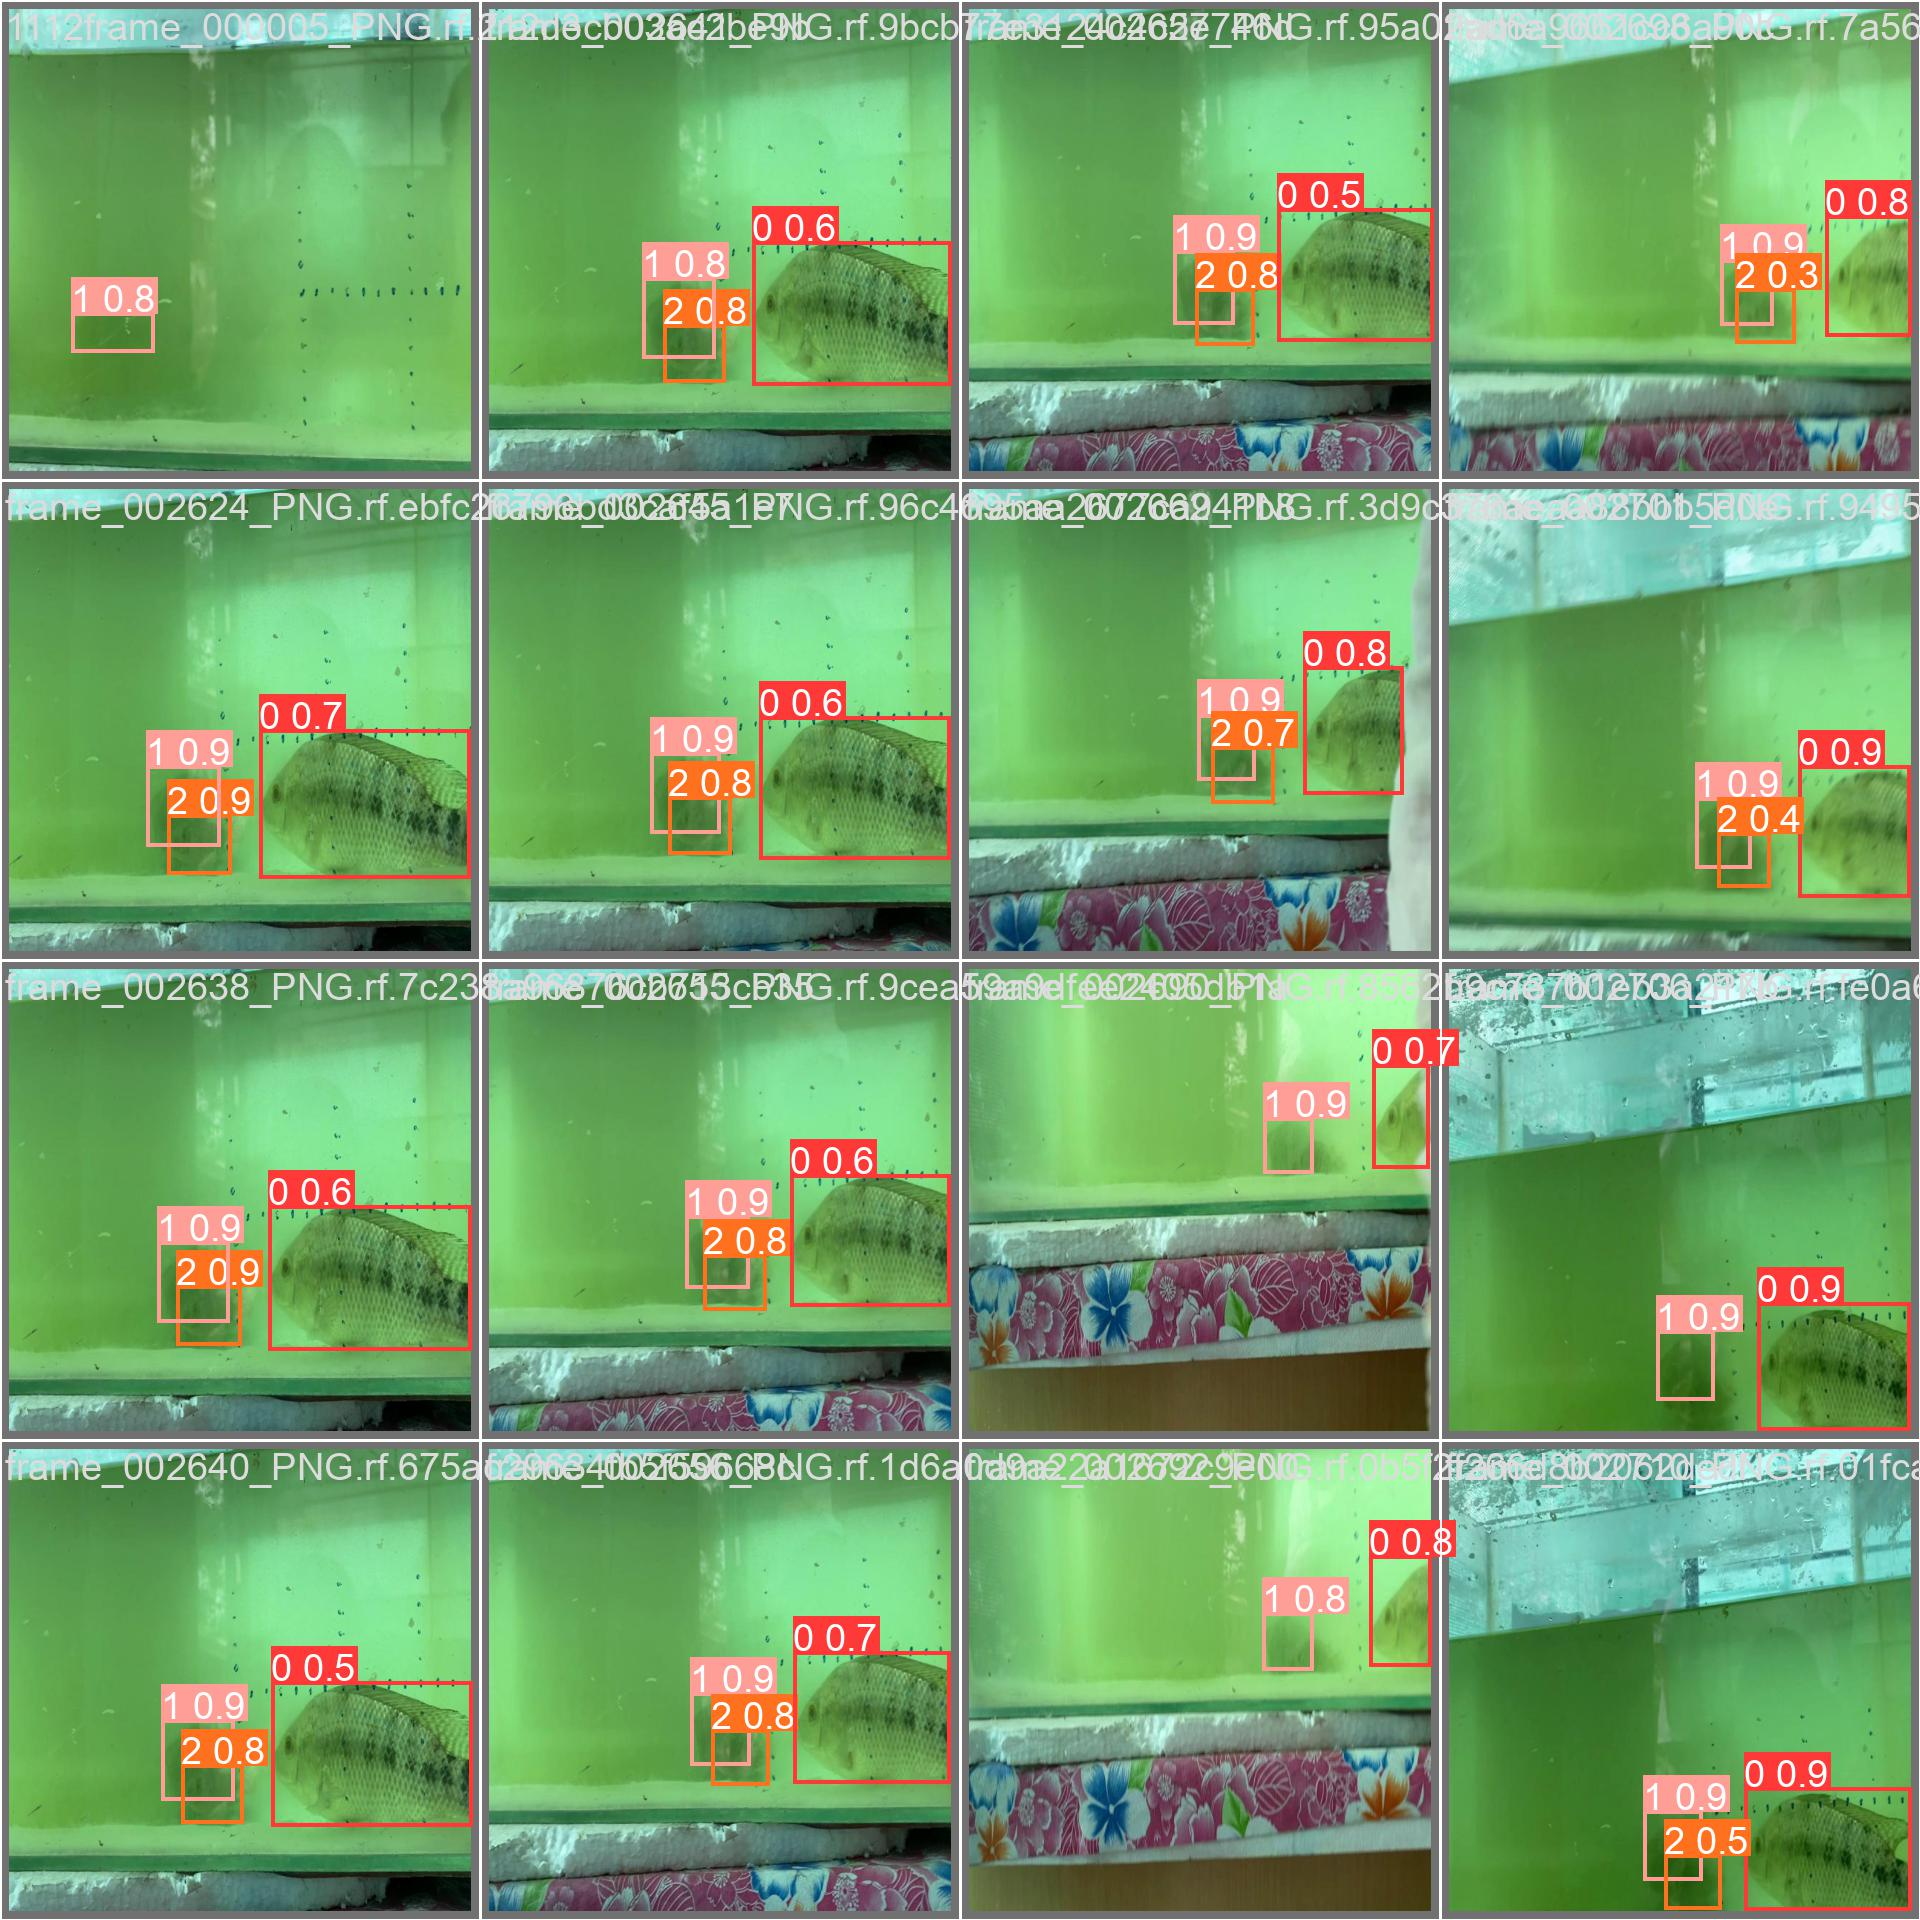

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/ultralytics/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [14]:
%cd {HOME}
!yolo task=detect mode=val model=/content/ultralytics/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.84 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8 summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Final-2/valid/labels.cache... 1065 images, 0 backgrounds, 0 corrupt: 100% 1065/1065 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 67/67 [00:20<00:00,  3.33it/s]
                   all       1065       2449      0.991      0.996      0.995      0.895
                     0       1065       1024      0.998      0.993      0.995      0.934
                     1       1065        797      0.997      0.997      0.995      0.895
                     2       1065        628      0.979      0.998      0.994      0.857
Speed: 1.1ms preprocess, 5.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/ultralytics/runs/detect/val


## Inference with Custom Model

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/ultralytics/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True save_txt=True

/content
Ultralytics YOLOv8.0.84 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8 summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/533 /content/datasets/Final-2/test/images/1112frame_000002_PNG.rf.52f9f412c6d20f91e155ec345808eff7.jpg: 800x800 1 0, 1 1, 9.9ms
image 2/533 /content/datasets/Final-2/test/images/1112frame_000007_PNG.rf.80bda83079667ad1dc9344d7e2ba5ab9.jpg: 800x800 1 1, 10.0ms
image 3/533 /content/datasets/Final-2/test/images/1112frame_000009_PNG.rf.3727a36993ab3b10bb34a589ed79ea7b.jpg: 800x800 1 1, 10.0ms
image 4/533 /content/datasets/Final-2/test/images/1112frame_000019_PNG.rf.79ca521e2bdc3be2d69a501be3430b7f.jpg: 800x800 1 1, 9.9ms
image 5/533 /content/datasets/Final-2/test/images/1112frame_000024_PNG.rf.b305a2b08c176fe62ade0750fa7c92fc.jpg: 800x800 1 1, 9.9ms
image 6/533 /content/datasets/Final-2/test/images/1112frame_000034_PNG.rf.30734882a47be4790e17ee57eae11b5b.jpg: 800x800 1 1, 9.9ms
image 7/533 /content/datasets/F

**NOTE:** Let's take a look at few results.

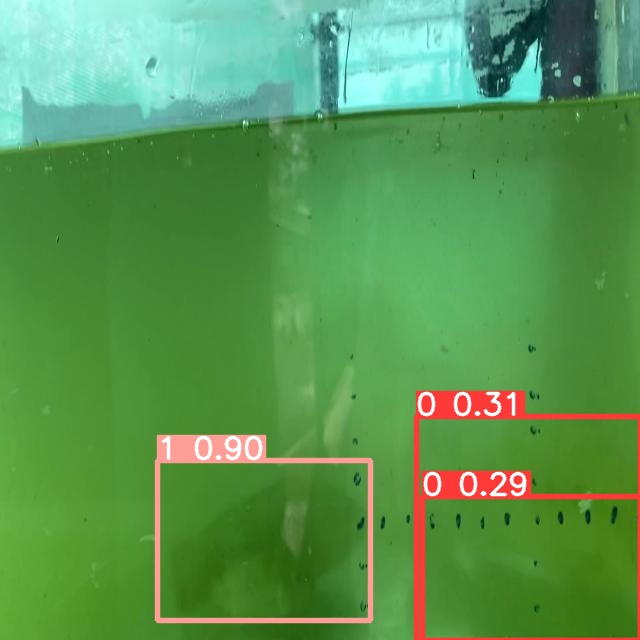

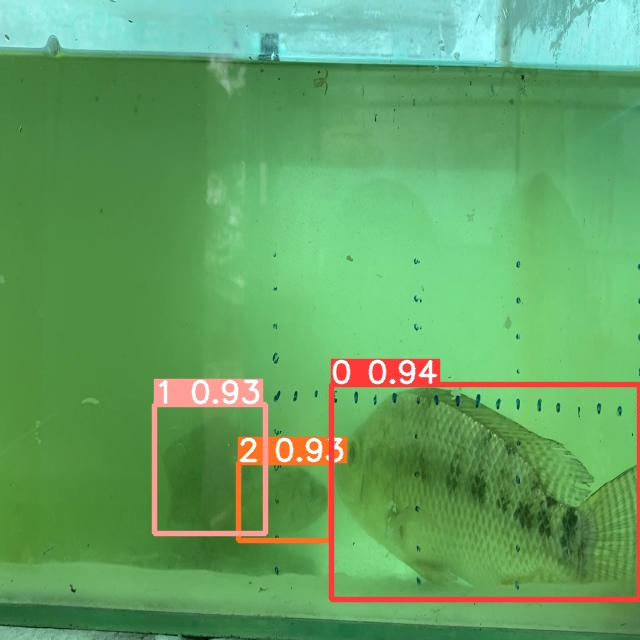

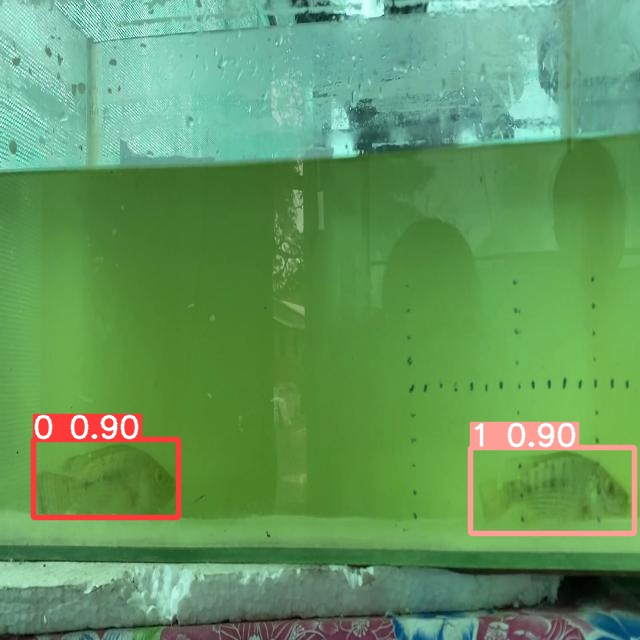

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/ultralytics/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [19]:
from google.colab import files


In [20]:
!zip -r /content/ultralytics/runs/detect.zip /content/ultralytics/runs/detect

  adding: content/ultralytics/runs/detect/ (stored 0%)
  adding: content/ultralytics/runs/detect/predict/ (stored 0%)
  adding: content/ultralytics/runs/detect/predict/frame_002993_PNG.rf.bdc46df39cc6f9eab0d641b1f2c18f15.jpg (deflated 6%)
  adding: content/ultralytics/runs/detect/predict/frame_001572_PNG.rf.6fda16c5593ed5e699e914c9490bdfc8.jpg (deflated 5%)
  adding: content/ultralytics/runs/detect/predict/2122frame_000428_PNG.rf.ad55418fdf1c4bc1e472848099da330f.jpg (deflated 5%)
  adding: content/ultralytics/runs/detect/predict/frame_000664_PNG.rf.f84617c6f89f2228a4852c7ee8e19a61.jpg (deflated 5%)
  adding: content/ultralytics/runs/detect/predict/frame_003773_PNG.rf.c521cb77f78f2f404c3b32983d23c19f.jpg (deflated 5%)
  adding: content/ultralytics/runs/detect/predict/frame_000104_PNG.rf.a06fb713c87708256e31a9b52f951c7a.jpg (deflated 5%)
  adding: content/ultralytics/runs/detect/predict/frame_001892_PNG.rf.b959d4a451e0a688c3b22fe3a2dfd273.jpg (deflated 5%)
  adding: content/ultralytics/r

In [21]:
files.download('/content/ultralytics/runs/detect.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.